## Characteristics

Scalar_XZ is a set of two modules for:

* Generation of 2D (xz-axis) masks and diffractive optical elements.
* Drawing sources, masks and fields.
* Propagation of light, determination of parameters, and other functions.

Light sources are loaded into the module using Scalar_field_X, using the incident_field function.

These modules are named: scalar_fields_XZ.py  and scalar_masks_XZ.py.

Each module present a main class:

* Scalar_field_XZ
* Scalar_masks_XZ

The main attributes for these classes are the following:

* self.x (numpy.array): linear array with x equidistant positions. The number of data is preferibly :math:`2^n` .
* self.z (numpy.array): linear array with z equidistant positions.
* self.wavelength (float): wavelength of the incident field.
* self.n (numpy.array): linear 2D array with size x * z storing the refraction index.
* self.u0 (numpy.array): linear array with x equidistant positions storing the incident complex field.
* self.u (numpy.array): linear 2D array with size x * z storing the complex field.
* self.n_background (numpy.float): refraction index of background.

We can also find these atributes:

* self.X (numpy.array): linear 2D array with size x * z storing X position.
* self.Z (numpy.array): linear 2D array with size x * z storing Z position.
* self.quality (float): quality of RS algorithm. Valid for values > 1.
* self.reduce_matrix (bool): Indicates if matrix are reduced for drawing purposes.
* self.info (str): description of data.
* self.fast (bool): If True, Rayleigh-Sommerfeld computations are performed using Fresnel approximation.
* self.type (str): Class of the field.
* self.date (str): date when performed.

The dimensional magnitudes are related to microns: `micron = 1.`

**Creating an instance**

In [1]:
from diffractio import (degrees, eps, mm, no_date, np, num_max_processors, plt,
                    sp, um)
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,15
rcParams['figure.dpi'] = 120
rcParams['savefig.dpi'] = 100

In [2]:
x0 = np.linspace(-200 * um, 200 * um, 512)
z0 = np.linspace(-100 * um, 600 * um, 512)
wavelength = 0.6238 * um

u1 = Scalar_field_XZ(x=x0, z=z0, wavelength=wavelength)

**Creating a light source**
Light sources for XZ propagation are defined in the scalar_sources_x.py module. 


*Example*: plane wave.

In [3]:
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
u1.incident_field(u0)

The light beam can also be placed at any plane in the z scale, not only at the beginning:

In [4]:
u1.incident_field(u0, z0=200*um)

**Masks**

Masks are defined in the scalar_masks_xz.py module. Masks can be defined in several ways. 

* In the first place, a linear plane mask can be added using Scalar_mask_X functions.
* Also, volumetric XZ masks can be defined using surfaces, arrays, etc.
* Specific XZ masks are defined.
* Most mask can be displaced in the x-z plane and rotated a certaint $\theta$ angle.
* The refraction index of the mask can be real numbers (transparent) of complex (absorbent).
* Refraction index defining the masks can be constant or defined by n(x,z) functions.


There are many methods that can be used to generate masks and diffractive optical elements:

**Generation of general masks**

* **convert_mask**: Converts a Scalar_mask_X in volumetric xz.
* **mask_from_function**: Phase mask defined between two surfaces f1 and f1: h(x,z)=f2(x,z)-f1(x,z)
* **mask_from_array**: Mask defined between two surfaces given by arrays (x,z): h(x,z)=f2(x,z)-f1(x,z).
* **object_by_surfaces**: "Mask defined by n surfaces given in array Fs={f1, f2, ....}
* **add_surfaces**: A topography fx is added to one of the faces of object u (self.n).
* **discretize_refraction_index**: Takes a refraction index an discretize it according refraction indexes.

**Specific XZ masks**

* **image**: Converts an image file in an xz-refraction index matrix.
* **semi_plane**: Inserts a semi-sphere in background (x>0).
* **layer**: Insert a layer with a certain depth.
* **rectangle**: Insert a rectangle in background.
* **slit**: Insert a slit in background.
* **sphere**: Insert a sphere in background.
* **semi_sphere**: Insert a semi_sphere in background.
* **lens_plane_convergent**: Insert a plane-convergent lens in background.
* **lens_plane_convergent**: Inserts a convergent lens in background.
* **lens_plane_divergent**: "Insert a plane-divergent lens in background.
* **lens_divergent**: Insert a  divergent lens in background.

* **aspheric_surface_z** (unfinished now).
* **aspheric_lens**: Define an aspheric lens. 
* **wedge**: Insert a wedge.
* **prism**: Similar to wedge but the use is different.
* **biprism**: Fresnel biprism.
* **ronchi_grating**: Insert a ronchi grating in background.
* **sine_grating**: Insert a sine grating in background
* **probe**: Probe with a sinusoidal shape.

* **rough_sheet**: Sheet with one rough surface.
* **wessenplatten**


For a more detailed description of each method, refer to the individual documentation of each one.

**Example**: convergent lens

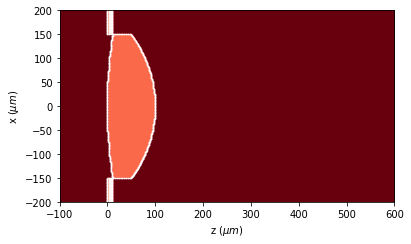

In [5]:
t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.lens_convergent(
    r0=(0, 0),
    aperture=300 * um,
    radius=(1000 * um, -250 * um),
    thickness=100 * um,
    refraction_index=2,
    angle=0 * degrees,
    mask=(10 * um, 3 + 0.05j))
t1.draw_refraction_index(scale='scaled');


Example: sphere with variable refraction index:

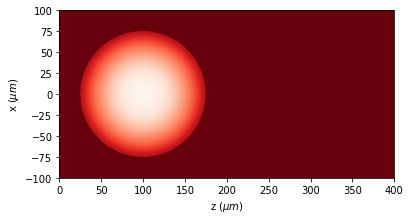

In [6]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 400 * um, 512)
wavelength = 0.5 * um

t2 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1.0)

pn = dict(n_out=1.5, n_center=4, cx=0 * um, cz=100 * um, radius=75 * um)

center = (pn['cx'], pn['cz'])
radius = pn['radius']
ref_index = "{p[n_out]}+({p[n_center]}-{p[n_out]})*(1-((X-{p[cx]})**2+(Z-{p[cz]})**2)/{p[radius]}**2)".format(
    p=pn)

t2.sphere(
    r0=center, radius=(radius, radius), refraction_index=ref_index, angle=0)

t2.draw_refraction_index(draw_borders=False, scale='scaled');

## Propagation and other parameters.

Propagation and other actions and parameters of the optical fields are defined in the scalar_field_x.py module. There are several methods of determining the field at a given plane after the mask:

* **RS**: Rayleigh-Sommerfeld propagation at a certain distance

* **fft**: Fast Fourier propagation at the far field.

* **ifft**: Inverse Fast Fourier propagation at the far field.

* **BPM**: Beam propagation method at a near distance.


The field can be stored in the same instance, generate a new instance, or generate a numpy.array when fast computation is required.

### Example of Rayleigh-Sommerfeld propagation

For Rayleigh-Sommerfeld propagation, it is not possible to consider variations of refraction index, but only propagation in vaccum or an constant refraction index. 

Nevertheless, the field at a distant plane from the object can be determined easily.

In [7]:
wavelength = .5 * um
x0 = np.linspace(-200 * um, 200 * um, 512)
z0 = np.linspace(1 * mm, 3 * mm, 512)

t1 = Scalar_mask_X(x0, wavelength)
t1.lens(x0=0 * um, radius=100 * um, focal=2 * mm)

u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

In [8]:
u1=u0*t1

u2 = Scalar_field_XZ(x=x0, z=z0, wavelength=wavelength)
u2.incident_field(u1)
u2.RS();

x = 0.391 um, z = 1986.301 um


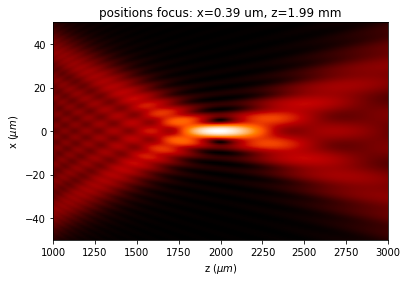

In [9]:
u2.draw(logarithm=True, draw_borders=False, scale='')
plt.ylim(-50,50)

x_f, z_f = u2.search_focus()
text = "positions focus: x={:2.2f} um, z={:2.2f} mm".format(x_f, z_f / mm)
plt.title(text);

### Example of Beam Propagation Method (BPM)
For Beam Propagation Method, propagations should be performed incrementally, from a plane z to another z+$\Delta$z. The refraction index at each position is considered and, then, we can consider the shape of the optical elements. 

In [10]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 200 * um, 512)
wavelength = 5 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(
    A=1, x0=0 * um, z0=0 * um, w0=10 * um, theta=0. * degrees)
u0.plane_wave(A=1, theta=0 * degrees)

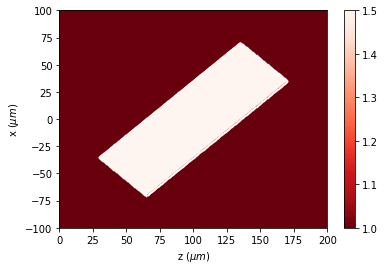

In [11]:
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
u1.rectangle(
    r0=(0 * um, 100 * um),
    size=(150 * um, 50 * um),
    angle=45 * degrees,
    refraction_index=1.5 - 0 * .00025j)
u1.draw_refraction_index(colorbar_kind='vertical')

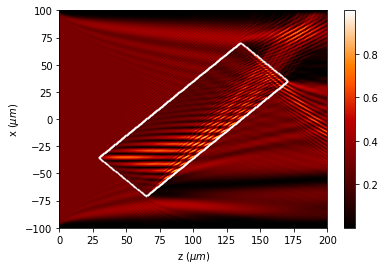

In [12]:
u1.BPM(verbose=False)
u1.draw(
    logarithm=True,
    normalize='maximum',
    draw_borders=True,
    colorbar_kind='vertical')

Also intensity, phase, amplitude profiles can be easily obtained using the class methods.

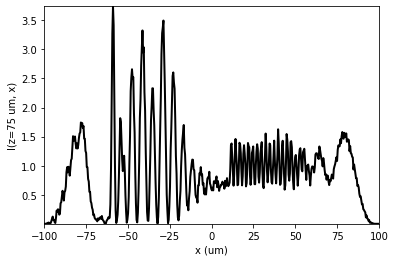

In [13]:
u1.profile_transversal(z0=75 * um);

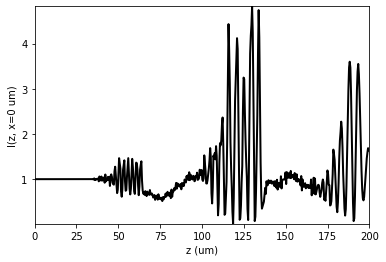

In [14]:
u1.profile_longitudinal(x0=0 * um);

### Rotating masks and fields

When developing a simulation, most functions present the posibility of rotating light sources and masks. 

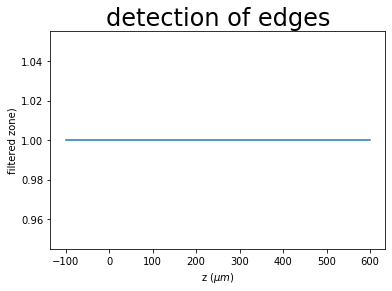

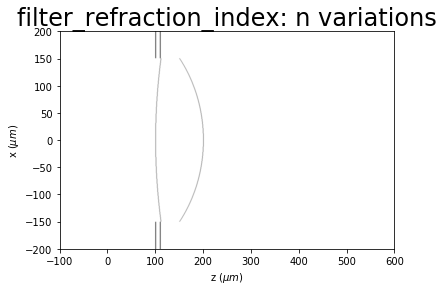

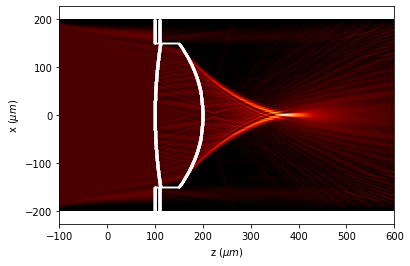

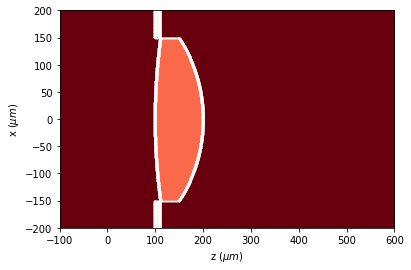

In [15]:
x0 = np.linspace(-200 * um, 200 * um, 1024)
z0 = np.linspace(-100 * um, 600 * um, 1024)
wavelength = 5 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)

u1.lens_convergent(
    r0=(0, 100),
    aperture=300 * um,
    radius=(1000 * um, -250 * um),
    thickness=100 * um,
    refraction_index=2,
    angle=0 * degrees,
    mask=(10 * um, 3 + 0.05j))

u1.filter_refraction_index(
    type_filter=3,
    pixels_filtering=2,
    max_diff_filter=0.01,
    draw_check=True)
u1.BPM(verbose=False)

u1.draw(
    logarithm=True,
    normalize='maximum',
    scale='equal',
    draw_borders=True)

u1.draw_refraction_index(draw_borders=True)

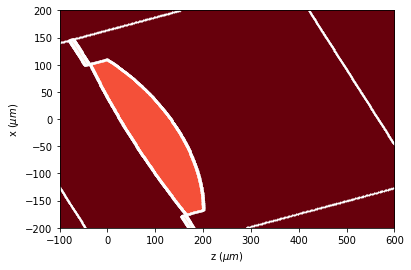

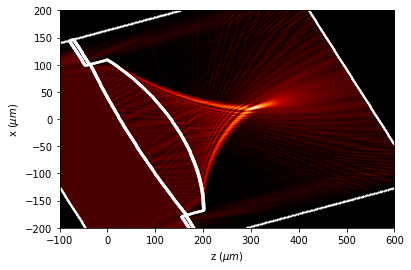

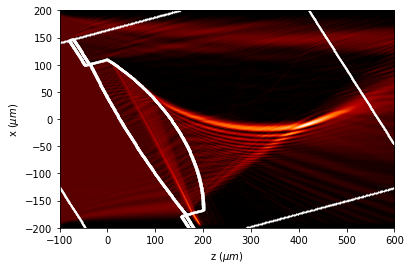

In [16]:
u1.rotate_field(
    angle=22.5 * degrees, center_rotation=(0, 100), kind='all')
u1.draw_refraction_index(draw_borders=True)
u1.draw(logarithm=True, draw_borders=True)

u1.clear_field()
u1.BPM(verbose=False)
u1.draw(logarithm=True, draw_borders=True)

### Save and load masks and fields
XZ module allows to save data to files and after recover those data.

In [17]:
filename='save_load.npz'

u1.info = """info:
    test_save_load():
    se graba una máscara para ver si se carga luego bien
    Se pueder en nombre, la fecha, etc.
    name: prueba
    date: 170731
    purpose: check testing
    """
u1.save_data(filename=filename)


/home/luismiguel/.local/lib/python3.6/site-packages/hickle/hickle.py:403: SerializedWarning: <class 'diffractio.scalar_sources_X.Scalar_source_X'> type not understood, data have been serialized
  SerializedWarning)


True

In [18]:
del u1

In [19]:
u2 = Scalar_field_XZ(None, None, None)
u2.load_data(filename=filename, verbose=True)
u2.draw_refraction_index()
u2.draw(logarithm=True, draw_borders=True);

ValueError: Cannot load file containing pickled data when allow_pickle=False

### Surface detection of masks
As XZ masks present a certain volume, we can detect the edges of the optical elements in order to a better representation.

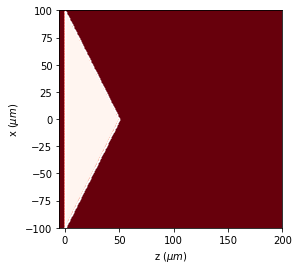

In [21]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(-5 * um, 200 * um, 512)
wavelength = 5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(theta=0. * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
u1.biprism(
    r0=(0, 0),
    length=200 * um,
    height=50 * um,
    refraction_index=1.5,
    angle=0)

u1.draw_refraction_index(draw_borders=True, scale='scaled')
u1.BPM()


The edges can be included in other figures, in order to improve the representation of fields. For example in the intensity distribution of the optical field.

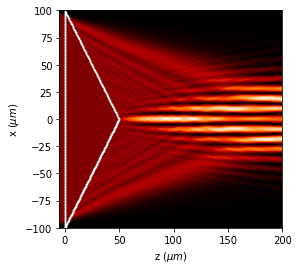

In [22]:
u1.draw(
    logarithm=True,
    normalize='maximum',
    draw_borders=True,
    scale='scaled')

Also, a better analysis of the phase can be performed using the edge detection tool.

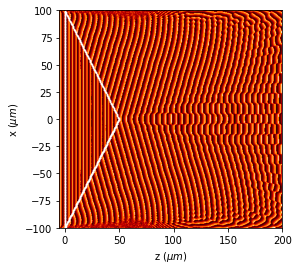

In [23]:
u1.draw(kind='phase', draw_borders=True, scale='scaled')

### Reduction of the field

Sometimes, as when light is focused by a lens, we need to analyze a small part of the processed area. We can do this using cut_resample function.

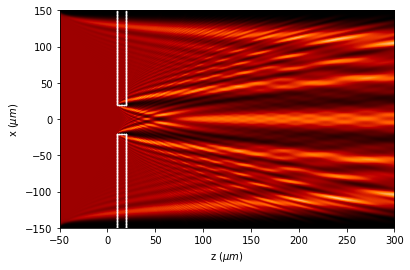

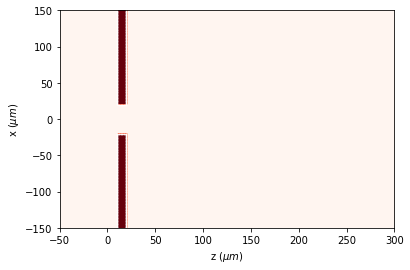

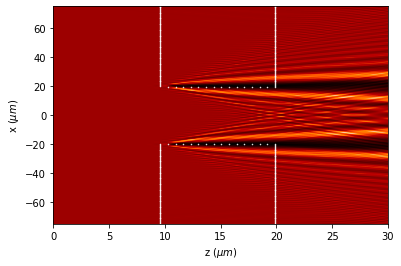

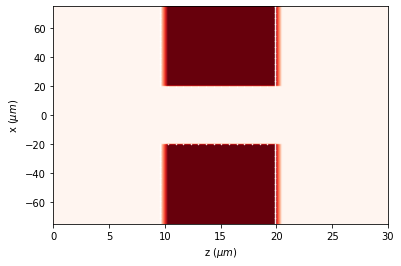

In [24]:
x0 = np.linspace(-150 * um, 150 * um, 512)
z0 = np.linspace(-50 * um * um, 300 * um, 512)
wavelength = 5 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=4)
u1.incident_field(u0)
u1.slit(
    r0=(0 * um, 10 * um),
    aperture=40 * um,
    depth=10 * um,
    refraction_index=1,
    refraction_index_center='',
    angle=0 * degrees)

u1.BPM(verbose=False)
u1.draw(kind='intensity', draw_borders=True)

u1.save_data(
    filename=filename, method='savez_compressed', add_name='_before')

u1.draw_refraction_index(draw_borders=True)

u1.cut_resample(
    x_limits=(-75, 75),
    z_limits=(0, 30),
    num_points=(512, 512),
    new_field=False)
u1.draw(kind='intensity', draw_borders=True)


u1.draw_refraction_index(draw_borders=True)

### Incident field: location
When defining a light source, it is usually placed at the first plane of the XZ area. 

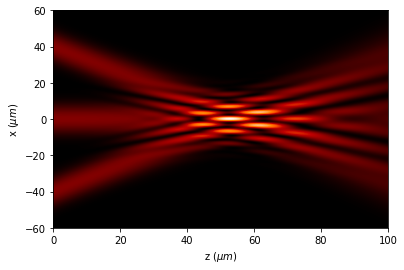

In [28]:
x0 = np.linspace(-60 * um, 60 * um, 512)
z0 = np.linspace(0 * um, 100 * um, 512)
wavelength = 5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(
    A=1, x0=0 * um, z0=0 * um, w0=10 * um, theta=0. * degrees)

u1 = Scalar_source_X(x=x0, wavelength=wavelength)
u1.gauss_beam(
    A=1, x0=40 * um, z0=0 * um, w0=10 * um, theta=-45. * degrees)

u2 = Scalar_source_X(x=x0, wavelength=wavelength)
u2.gauss_beam(
    A=1, x0=-40 * um, z0=0 * um, w0=10 * um, theta=45. * degrees)

u3=u0+u1+u2

u4 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u4.incident_field(u3)
u4.BPM()
u4.draw(kind='intensity', logarithm=True)

Nevertheless, we can locate the source at any plane:

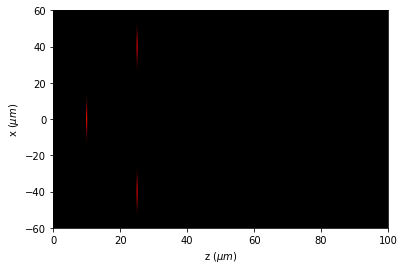

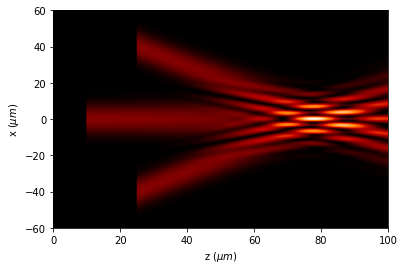

In [29]:
x0 = np.linspace(-60 * um, 60 * um, 512)
z0 = np.linspace(0 * um, 100 * um, 512)
wavelength = 5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(
    A=1, x0=0 * um, z0=0 * um, w0=10 * um, theta=0. * degrees)

t0 = Scalar_source_X(x=x0, wavelength=wavelength)
t0.gauss_beam(
    A=1, x0=40 * um, z0=0 * um, w0=10 * um, theta=-45. * degrees)

t1 = Scalar_source_X(x=x0, wavelength=wavelength)
t1.gauss_beam(
    A=1, x0=-40 * um, z0=0 * um, w0=10 * um, theta=45. * degrees)

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0, z0=10 * um)
u1.incident_field(t0, z0=25 * um)
u1.incident_field(t1, z0=25 * um)
u1.draw(kind='intensity', logarithm=True)


u1.BPM()
u1.draw(kind='intensity', logarithm=True)

### Recovering the final field
After processing the simulation, many a times the final result is the last plane of the simulation, which can be easily recovered using final_field() method.

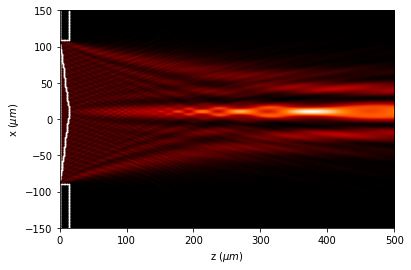

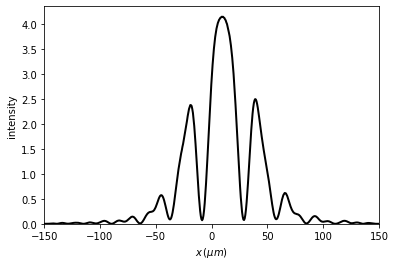

In [30]:
x0 = np.linspace(-150 * um, 150 * um, 512)
z0 = np.linspace(0 * um, 500 * um, 512)
wavelength = 5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
u1.slit(
    r0=(10 * um, 0 * um),
    aperture=200 * um,
    depth=15 * um,
    refraction_index=1 + 5j,
    refraction_index_center='',
    angle=0 * degrees)
u1.biprism(
    r0=(10 * um, 0 * um),
    length=200 * um,
    height=15 * um,
    refraction_index=1.5,
    angle=0 * degrees)
u1.BPM()

u1.draw(kind='intensity', draw_borders=True)

u_final = u1.final_field()
u_final.draw()


### Propagation: Rayleigh-Sommerfeld approach

Elements are plane (TEA approximation)

no normalization: not False, 'maximum, 'mean'
x = 0.391 um, z = 1987.280 um


Text(0.5, 1.0, 'positions focus: x=0.39 um, z=1.99 mm')

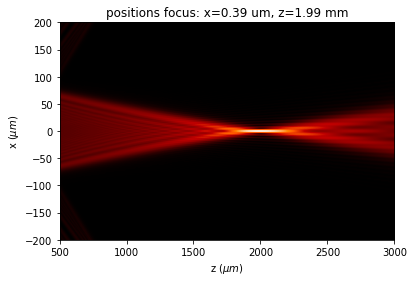

In [31]:
wavelength = .5 * um
x0 = np.linspace(-200 * um, 200 * um, 512)
z0 = np.linspace(500 * um, 3 * mm, 512)

t1 = Scalar_mask_X(x0, wavelength)
t1.lens(x0=0 * um, radius=100 * um, focal=2 * mm)
# t1.draw(kind='phase')

f1 = Scalar_source_X(x0, wavelength)
f1.plane_wave(A=1, theta=0 * degrees)
# f1.draw()

u1 = Scalar_field_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(f1 * t1)
u1.RS()
u1.draw(logarithm=1, normalize='intensity', draw_borders=False)
x_f, z_f = u1.search_focus()
text = "positions focus: x={:2.2f} um, z={:2.2f} mm".format(
    x_f, z_f / mm)
plt.title(text)

### Propagation: BPM approach
Using BPM the optical elements present a certain depth.

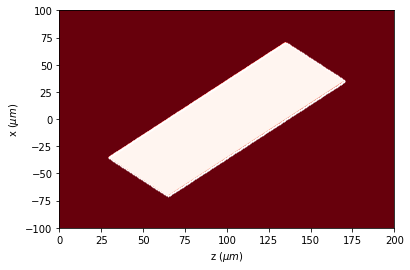

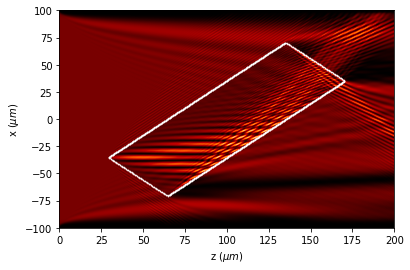

In [32]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 200 * um, 512)
wavelength = 5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(
    A=1, x0=0 * um, z0=0 * um, w0=10 * um, theta=0. * degrees)
u0.plane_wave(A=1, theta=0 * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
u1.rectangle(
    r0=(0 * um, 100 * um),
    size=(150 * um, 50 * um),
    angle=45 * degrees,
    refraction_index=1.5 - 0 * .00025j)

u1.draw_refraction_index()
u1.BPM(verbose=False)
u1.draw(logarithm=True, normalize='maximum', draw_borders=True)

### Comparison between RS and BPM with the same initial fields

**RS**

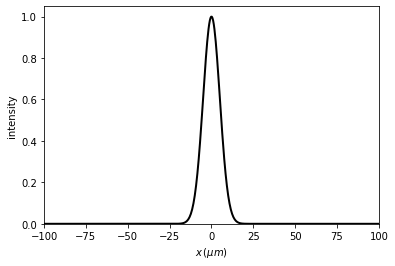

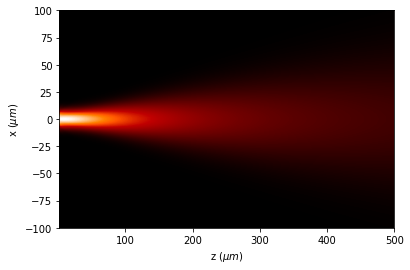

In [33]:
length = 200 * um
wavelength = 5 * um
x0 = np.linspace(-length / 2, length / 2, 512)
z0 = np.linspace(2 * um, 500 * um, 512)

# source
f1 = Scalar_source_X(x0, wavelength)
f1.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=10 * um, theta=0 * degrees)
f1.draw(kind='intensity')

# RS
u1 = Scalar_field_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(f1)
u1.RS()
u1.draw(
    kind='intensity',
    logarithm=1,
    draw_borders=False)

u_RS = u1.u


**BPM**

no normalization: not False, 'maximum, 'mean'


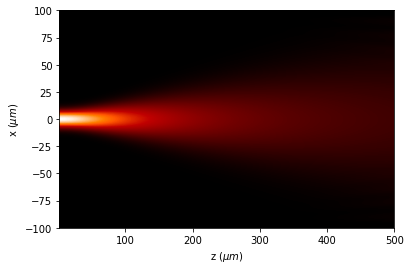

In [34]:

u1.clear_field()
u1.incident_field(f1)
u1.BPM(verbose=False)
u1.draw(
    kind='intensity',
    logarithm=1,
    normalize='intensity',
    draw_borders=False)

u_BPM = u1.u;

**Differences**

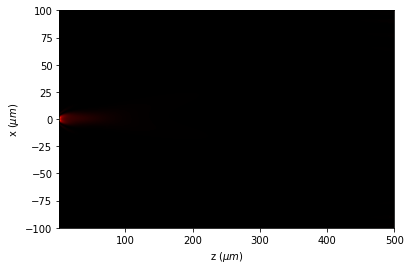

In [36]:
difference = np.abs(u_RS)**2 - np.abs(u_BPM)**2
u1.u = difference
u1.draw(kind='intensity', logarithm=False, normalize=False);

### Drawing profiles of the XZ field

### Videos of the XZ profiles

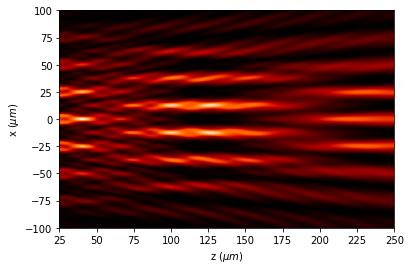

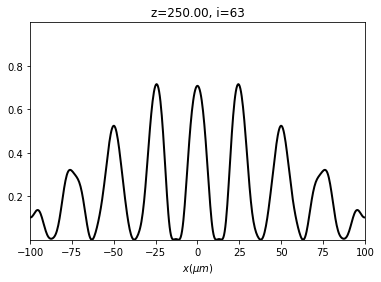

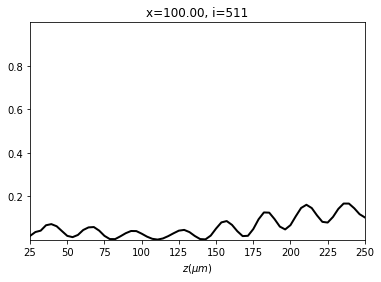

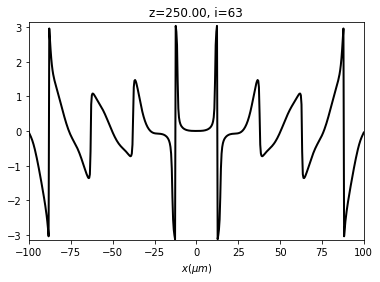

In [37]:
length = 200 * um
wavelength = 5 * um
period = 25 * um
z_talbot = 2 * period**2 / wavelength
x0 = np.linspace(-length / 2, length / 2, 512)
z0 = np.linspace(25 * um, 1 * z_talbot, 64)

u0 = Scalar_source_X(x0, wavelength)
u0.gauss_beam(
    A=1, x0=0 * um, z0=-100 * um, w0=100 * um, theta=0 * degrees)

t1 = Scalar_mask_X(x0, wavelength)
t1.ronchi_grating(period=25 * um, x0=0 * um, fill_factor=0.5)

u1 = Scalar_field_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(t1 * u0)
u1.RS()

u1.draw(
    kind='intensity',
    logarithm=False,
    normalize='maximum',
    draw_borders=True,
    filename='')

u1.video_profiles(
    kind='intensity',
    kind_profile='transversal',
    wait=0.001,
    logarithm=True,
    normalize='maximum',
    filename=filename + "_int_trans.avi")

u1.video_profiles(
    kind='intensity',
    kind_profile='longitudinal',
    wait=0.001,
    logarithm=True,
    normalize='maximum',
    filename=filename + "_int_long.avi")

u1.video_profiles(
    kind='phase',
    kind_profile='transversal',
    wait=0.001,
    logarithm=True,
    normalize='maximum',
    filename=filename + "_pha_trans.avi");

### Visualizing fields using interactive tools

<IPython.core.display.Javascript object>


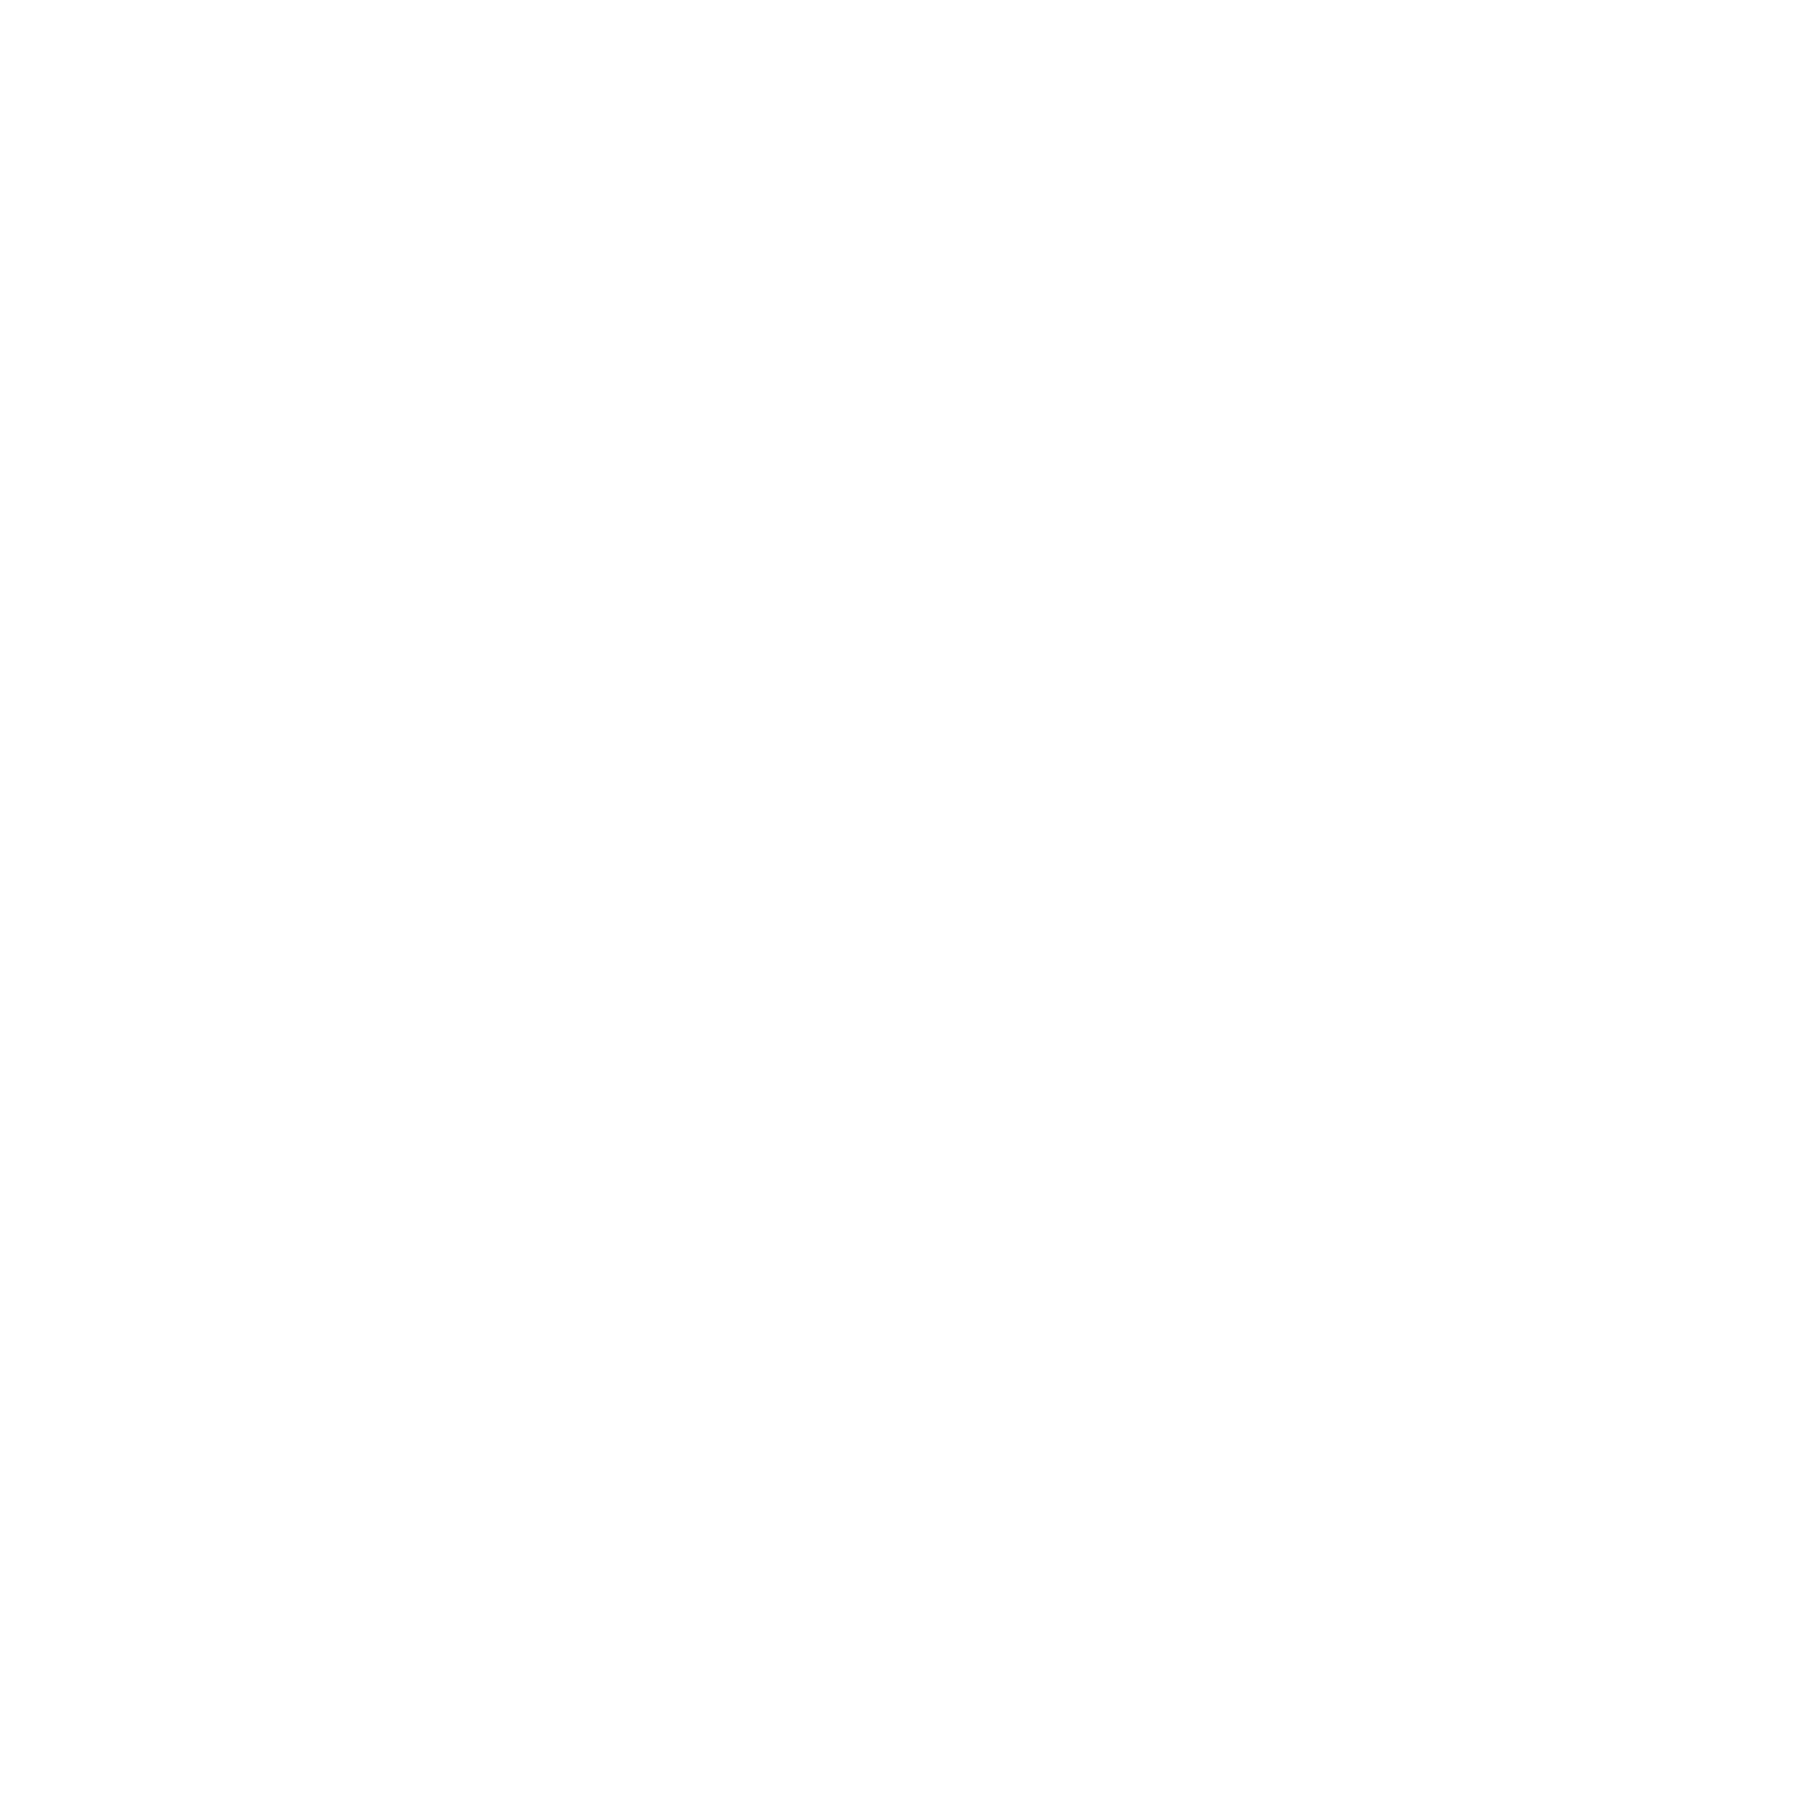

In [38]:
%matplotlib notebook

x0 = np.linspace(-25 * um, 25 * um, 512)
z0 = np.linspace(0 * um, 75 * um, 128)
wavelength = 5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
u1.mask_field(size_edge=5 * um)
u1.sphere(
    r0=(0 * um, 20 * um),
    radius=(20 * um, 20 * um),
    refraction_index=1.5)
u1.BPM(verbose=False)
u1.draw_profiles_interactive(
    kind='intensity', logarithm=True, normalize='maximum');

### longitudinal profiles

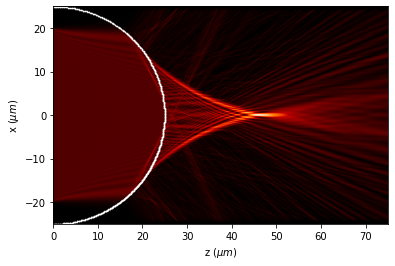

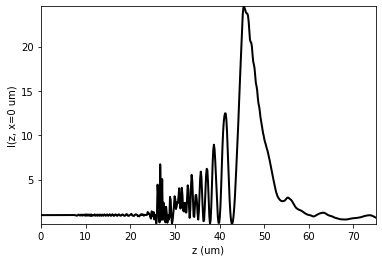

In [39]:
%matplotlib inline
x0 = np.linspace(-25 * um, 25 * um, 512)
z0 = np.linspace(0 * um, 75 * um, 512)
wavelength = .5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
u1.mask_field(size_edge=5 * um)
u1.sphere(
    r0=(0 * um, 0 * um), radius=(25 * um, 25 * um), refraction_index=2)
u1.BPM(verbose=False)
u1.draw(logarithm=True, normalize='maximum', draw_borders=True)


u1.profile_longitudinal(x0=0 * um);

### transversal profiles

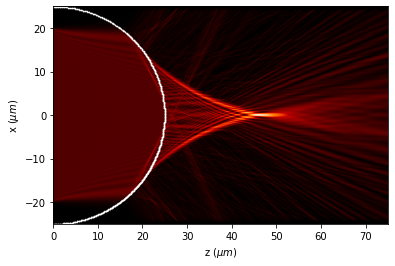

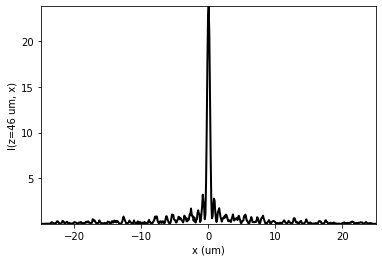

In [40]:
x0 = np.linspace(-25 * um, 25 * um, 512)
z0 = np.linspace(0 * um, 75 * um, 512)
wavelength = .5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
u1.mask_field(size_edge=5 * um)
u1.sphere(
    r0=(0 * um, 0 * um), radius=(25 * um, 25 * um), refraction_index=2)
u1.BPM(verbose=False)
u1.draw(logarithm=True, normalize='maximum', draw_borders=True)


u1.profile_transversal(z0=46 * um);

### Find focus tool
When focusing a light field, with a lens for example, sometimes we need to determine the location of maximum intensity. This can be easily determined using search_focus() method.

x = 0.031 um, z = 24.110 um


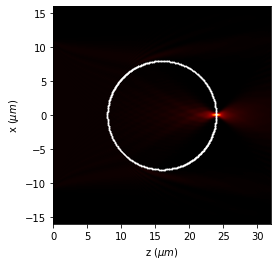

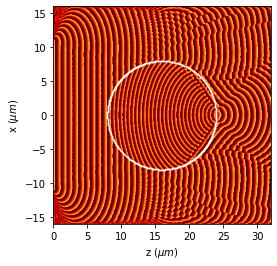

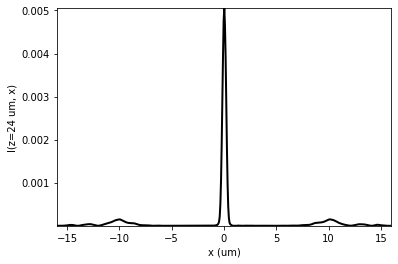

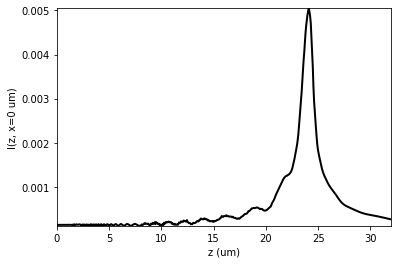

In [41]:
radius_sphere = 8 * um
x0 = np.linspace(-2 * radius_sphere * um, 2 * radius_sphere * um, 512)
z0 = np.linspace(0 * um, 4* radius_sphere, 512)
wavelength = .85 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(
    A=1,
    x0=0 * um,
    z0=5000 * um,
    w0=radius_sphere / 2,
    theta=0. * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
u1.mask_field(size_edge=5 * um)


u1.sphere(
    r0=(0, 2 * radius_sphere),
    radius=(radius_sphere, radius_sphere),
    refraction_index=1.5)
u1.BPM(verbose=False)
u1.draw(logarithm=False, normalize=False, draw_borders=True, scale='scaled')

u1.draw(logarithm=False, kind='phase', draw_borders=True, scale='scaled')


x_max, z_max = u1.search_focus()

u1.profile_transversal(z0=z_max)
u1.profile_longitudinal(x0=x_max);

### BPM_inverse

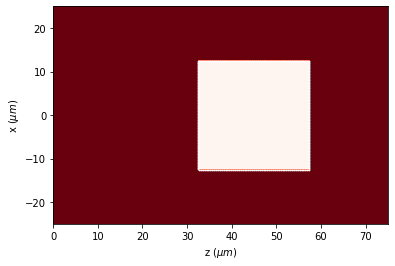

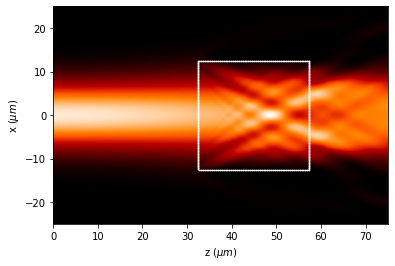

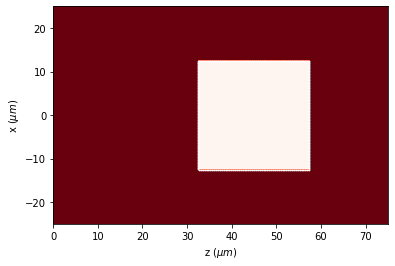

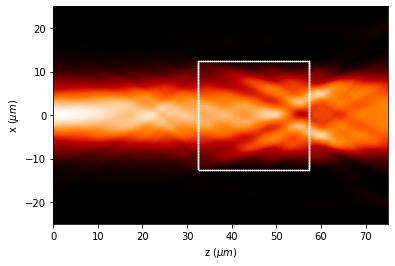

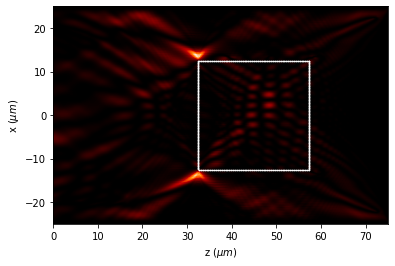

In [42]:
x0 = np.linspace(-25 * um, 25 * um, 512)
z0 = np.linspace(0 * um, 75 * um, 512)
wavelength = 5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=10 * um, theta=0 * degrees)

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)

u1.rectangle(
    r0=(0 * um, 45 * um),
    size=(25 * um, 25 * um),
    angle=0 * degrees,
    refraction_index=1.5)

u1.draw_refraction_index(draw_borders=True, min_incr=0.001)
u1.BPM(verbose=False)
u1.draw(
    logarithm=True,
    normalize='maximum',
    draw_borders=True,
    min_incr=0.001)


# Hago la inverse y drawing los resultados
u2 = u1.BPM_inverse()
u2.draw_refraction_index(draw_borders=True, min_incr=0.001)
u2.draw(
    logarithm=True,
    normalize='maximum',
    draw_borders=True,
    min_incr=0.001)

differences = u1 - u2
differences.u = np.abs(u1.u) - np.abs(u2.u)
differences.draw(
    logarithm=True,
    normalize='maximum',
    draw_borders=True,
    min_incr=0.001);

### BPM_backpropagation

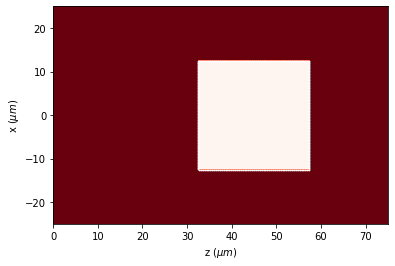

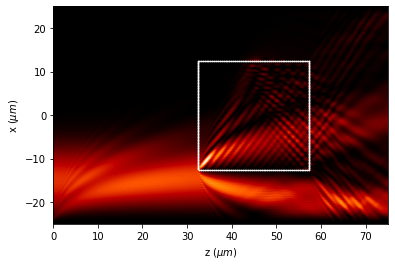

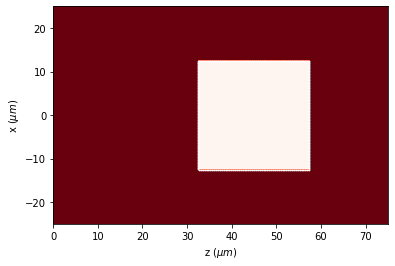

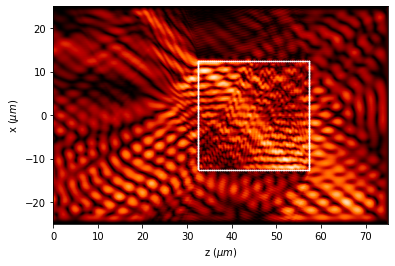

In [43]:
"""
here we do two experiments
1. propagate and after backpropagate the last field
2. backpropagate u0=1
"""
x0 = np.linspace(-25 * um, 25 * um, 512)
z0 = np.linspace(0 * um, 75 * um, 512)
wavelength = 5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(theta=20 * degrees)
u0.gauss_beam(
    A=1, x0=-15 * um, z0=0 * um, w0=10 * um, theta=0. * degrees)

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)

u1.rectangle(
    r0=(0 * um, 45 * um),
    size=(25 * um, 25 * um),
    angle=0 * degrees,
    refraction_index=4)

u1.draw_refraction_index(draw_borders=True, min_incr=0.001)
u1.BPM(verbose=False)
u1.draw(
    logarithm=True,
    normalize='maximum',
    draw_borders=True,
    min_incr=0.001)

# Hago la inverse y drawing los resultados
u1.u[:, -1] = 1
u2 = u1.BPM_back_propagation()
u2.draw_refraction_index(draw_borders=True, min_incr=0.001)
u2.draw(
    logarithm=True,
    normalize='maximum',
    draw_borders=True,
    min_incr=0.001);

### BPM_backpropagation_2

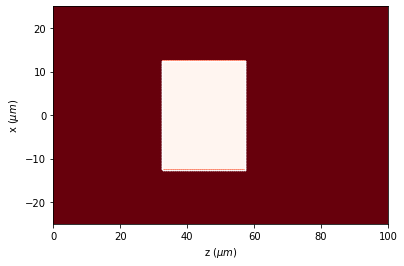

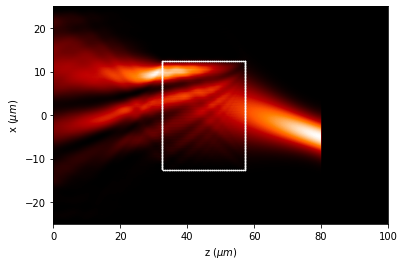

In [53]:
"""
we place a field at a certain position and after we backpropagate
"""
x0 = np.linspace(-25 * um, 25 * um, 512)
z0 = np.linspace(0 * um, 100 * um, 512)
wavelength = 5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(theta=20 * degrees)
u0.gauss_beam(
    A=1, x0=-5 * um, z0=0 * um, w0=5 * um, theta=15. * degrees)

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

u1.rectangle(
    r0=(0 * um, 45 * um),
    size=(25 * um, 25 * um),
    angle=0 * degrees,
    refraction_index=2)

u1.incident_field(u0, z0=80 * um)

# Hago la inverse y drawing los resultados
u2 = u1.BPM_back_propagation()

u2.draw_refraction_index(draw_borders=True, min_incr=0.001)
u2.draw(
    logarithm=True,
    normalize='maximum',
    draw_borders=True,
    min_incr=0.001);

### BPM_n_background

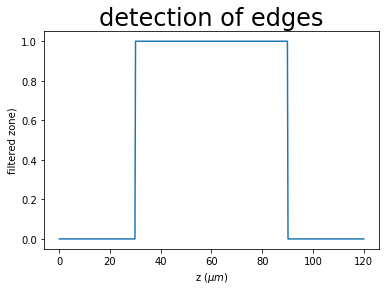

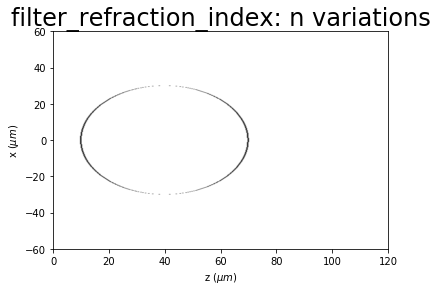

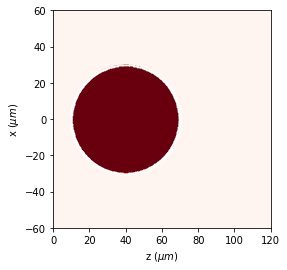

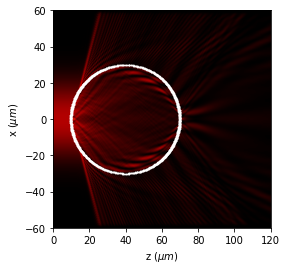

In [45]:
x0 = np.linspace(-60 * um, 60 * um, 512)
z0 = np.linspace(0 * um, 120 * um, 512)
wavelength = 4 * um

radius_sphere = 30 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(
    A=1, x0=0 * um, z0=60 * um, w0=25 * um, theta=0 * degrees)

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=4)
u1.incident_field(u0)
u1.mask_field(size_edge=5 * um)

u1.sphere(
    r0=(0, 40 * um),
    radius=(radius_sphere, radius_sphere),
    refraction_index=1)

u1.filter_refraction_index(
    type_filter=3,
    pixels_filtering=2,
    max_diff_filter=0.01,
    draw_check=True)

u1.BPM(verbose=False)
u1.draw_refraction_index(scale='scaled')

u1.draw(
    kind='intensity',
    logarithm=True,
    normalize='maximum',
    draw_borders=True,
    scale='scaled');

### RS_polychromatic

In [58]:
def _func_polychromatic_RS_(wavelength):
    x0 = np.linspace(-100 * um, 100 * um, 512)

    f1 = Scalar_source_X(x0, wavelength)
    f1.gauss_beam(A=1, x0=0, z0=0 * um, w0=50 * um, theta=0 * degrees)

    t1 = Scalar_mask_X(x0, wavelength)
    t1.ronchi_grating(period=10 * um, x0=0 * um, fill_factor=0.5)

    initial_field = t1
    return initial_field

In [59]:
def _func_polychromatic_BPM_(wavelength):
    x0 = np.linspace(-200 * um, 200 * um, 1024)

    t1 = Scalar_mask_X(x0, wavelength)
    t1.ronchi_grating(period=15 * um, x0=0 * um, fill_factor=0.5)

    f1 = Scalar_source_X(x0, wavelength)
    f1.gauss_beam(A=1, x0=0, z0=0 * um, w0=100 * um, theta=0 * degrees)

    z = np.linspace(1 * um, 5 * mm, 1024)
    u1 = Scalar_mask_XZ(x0, z, wavelength, n_background=1)
    u1.incident_field(f1 * t1)

    u1.rectangle(
        r0=(-100 * um, 1500 * um),
        size=(200 * um, 1000 * um),
        angle=0 * degrees,
        refraction_index=4)

    return u1

no normalization: not False, 'maximum, 'mean'


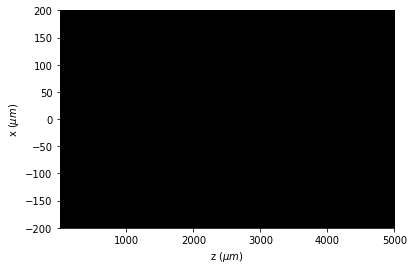

In [60]:
wavelengths = np.linspace(0.4, 0.8, 11)
spectrum = ''
initial_field = _func_polychromatic_BPM_(wavelengths[0])
z0 = initial_field.z
x0 = initial_field.x

u1 = Scalar_mask_XZ(x0, z0, wavelengths[0], n_background=1)
u_poly = u1.RS_polychromatic(
    _func_polychromatic_BPM_,
    wavelengths,
    spectrum,
    verbose=False,
    num_processors=num_max_processors)
u_poly.draw(logarithm=True, normalize='intensity', draw_borders=True);


### polychromatic light: no multiprocessing

When using polychromatic light in xz module, we can process each wavelength, and then sum the intensities distribution for each wavelenght. We can see two examples, valid for RS and BPM techniques:

After, we can use multiprocessing

### BPM_polychromatic

In [49]:
def generate_BPM_field():
    x0 = np.linspace(-25 * um, 25 * um, 512)
    z0 = np.linspace(0 * um, 75 * um, 256)
    wavelength = .5 * um
    u0 = Scalar_source_X(x=x0, wavelength=wavelength)
    u0.plane_wave(A=1, theta=0 * degrees)
    u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
    u1.incident_field(u0)
    #u1.mask_field(size_edge=5 * um)
    u1.sphere(
        r0=(0 * um, 0 * um), radius=(25 * um, 25 * um), refraction_index=2)


    u1.BPM(verbose=False)

    return u1

In [50]:
def generate_BPM_gauss():

    length = 500 * um
    wavelength = .5 * um
    x0 = np.linspace(-length / 2, length / 2, 512)
    z0 = np.linspace(0 * um, 500 * um, 256)

    x_ini = -250 * um * np.tan(30 * degrees)
    print("x_ini={}".format(x_ini))
    # source
    f1 = Scalar_source_X(x0, wavelength)
    f1.gauss_beam(A=1, x0=0, z0=250 * um, w0=10 * um, theta=0 * degrees)

    u1 = Scalar_field_XZ(x=x0, z=z0, wavelength=wavelength)
    u1.clear_refraction_index()
    u1.incident_field(f1)
    u1.BPM(verbose=False)
    return u1

In [51]:
u_focus = generate_BPM_field()
u_gauss = generate_BPM_gauss()

x_ini=-144.33756729740642


no normalization: not False, 'maximum, 'mean'


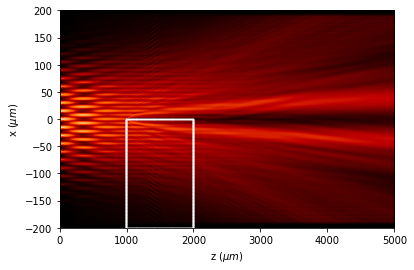

In [52]:
wavelengths = np.linspace(0.4, 0.8, 11)
spectrum = ''
initial_field = _func_polychromatic_BPM_(wavelengths[0])
z0 = initial_field.z
x0 = initial_field.x

u1 = Scalar_mask_XZ(x0, z0, wavelengths[0], n_background=1)
u_poly = u1.BPM_polychromatic(
    _func_polychromatic_BPM_,
    wavelengths,
    spectrum,
    verbose=True,
    num_processors=num_max_processors)
u_poly.draw(logarithm=True, normalize='intensity', draw_borders=True);
